## Introduction to Tensorflow and MNIST
*Citation: Google Tensorflow Introduction: MNIST for Beginners, What's an MNIST by Mike Bernico*

The MNIST database (Mixed National Institute of Standards database) is a large database of handwritten digits commonly used for training various processing system. The database is also used for training and testing in the machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 20x20 pixel bounding box and anti-aliased, which introduced grayscale levels. [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database)

Consider MNIST as the "hello world" of computer vision

**Objectives Today:** 
- Setup tensorflow in an ubuntu ec2 environments. This will allow for you to scale your computing power.
- Run tensorflow basic introduction on mnist
- Review examples and applications of tensorflow currently


**MNIST Resource List**
- Google Tutorial: 
- [Sklearn MNIST Tutorial](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction)
- [Skleanrn MNIST Output](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) Review to give us context of tensorflow within our current learning environment
- [Lasagne](http://lasagne.readthedocs.io/en/latest/user/tutorial.html)

### Converting images to matrices

![](./images/vl_mnist_knn.png)

[view youtube video](https://www.youtube.com/watch?v=ZD_tfNpKzHY)

__Scipy provides a method to convert images such as png to a matrix: [scipy.misc.imread()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.imread.html)__

    imread uses the Python Imaging Library (PIL) to read an image. The following notes are from the PIL documentation.

    mode can be one of the following strings:

    - ‘L’ (8-bit pixels, black and white)
    - ‘P’ (8-bit pixels, mapped to any other mode using a color palette)
    - ‘RGB’ (3x8-bit pixels, true color)
    - ‘RGBA’ (4x8-bit pixels, true color with transparency mask)
    - ‘CMYK’ (4x8-bit pixels, color separation)
    - ‘YCbCr’ (3x8-bit pixels, color video format)
    - ‘I’ (32-bit signed integer pixels)
    - ‘F’ (32-bit floating point pixels
    
** We will see this in tensorflow image library as well**

### Compare various algorithsm for MNIST Classification, Handwritten Digit Classification

Read about the variety of results, given different transformations of the MINST dataset, [Classification datasets results](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)

From the wikipedia page: 
![](./images/wiki-mnisttable.png)

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

import os
from glob import glob

%matplotlib inline

In [2]:
#potential error fixed with "sudo apt-get install libsm6 libxrender1 libfontconfig1"

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
sess = tf.InteractiveSession()
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
#let's look at the dataset shape
# CHECK: Why are their 10 labels? What method is used here?
# CHECK: What is a validation set?
print "This is the Training set: ", mnist.train.images.shape
print "This is the Training labels: ", mnist.train.labels.shape
print "This is the Testing set: ", mnist.test.images.shape
print "This is the Testing labels: ", mnist.test.images.shape
print "This is the Validation set: ", mnist.validation.images.shape

This is the Training set:  (55000, 784)
This is the Training labels:  (55000, 10)
This is the Testing set:  (10000, 784)
This is the Testing labels:  (10000, 784)
This is the Validation set:  (5000, 784)


## Validation Set

What are the ways we used for model validation?
- Train/Test Split
- K-Fold CV

This set uses another method: "Train/Validation/Test" 

**Why this other method?**
- Test set is a pure hold out set that the model has never seen
- K-Fold CV is a great choice
- Biggest limit in deep learning so K-Fold CV may not be available
- Biggest validation in text set, the better. Thus you need a lot more data 

In [5]:
#print out matrix for first image in tensorflow 
mnist.train.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [6]:
#What happened to the image? It was flattened out

mnist.train.images[0].shape

(784,)

In [7]:
# Can we change the size of the image? 
a = np.reshape(mnist.train.images[0], [28,28])
print a.shape
#print a

(28, 28)


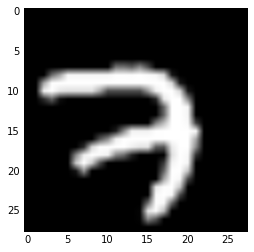

In [8]:
#Let's see what this image looks like
# Matrix can be described as a mapping of pixel intensity
# What happens when we add color? We add a dimension.

plt.imshow(a, cmap='Greys_r')

In [14]:
#Implementation of tensorflow from Google tutorial with neural networks below
#Follow along here: https://www.tensorflow.org/versions/0.6.0/tutorials/mnist/beginners/index.html

In [9]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [10]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [11]:
print y

Tensor("Softmax:0", shape=(?, 10), dtype=float32)


In [12]:
y_ = tf.placeholder(tf.float32, [None, 10])


In [13]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))


In [14]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)


In [15]:
init = tf.initialize_all_variables()


In [16]:
sess = tf.Session()
sess.run(init)

In [17]:
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [18]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))


In [19]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [20]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))


0.9185


In [ ]:
#logistic regression using tensorflow -- work in progress

In [10]:
graph = tf.Graph()

with graph.as_default():
    
    # variables_
    batch_size = 120 
    beta = .001 #regularization
    image_size = 28
    num_labels = 10

    # at run time with a training minibatch
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf.valid_dataset = tf.constant(mnist.validation.images)
    tf.test_dataset = tf.constant(mnist.test.images)
    
    #weights and biases for output/logit layer
    w_logit = tf.Variable(tf.truncated_normal([image_size * image_size, num_labels]))
    b_logit = tf.Variable(tf.zeros([num_labels]))

def model(data):
    '''
    Assembles the NM
    '''
    return tf.matmul(data, w_logit) + b_logit #return the output layer, tf matrix multiplication


y_ = tf.placeholder(tf.float32, [None, 10])

#Training Computations
logits = model(tf_train_dataset)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels)) #compare training with actual
regularized_loss = tf.nn.l2_loss(w_logit)
total_loss = loss + beta * regularized_loss

#Optimizer - bug in code prevents from running correctly
#optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
#optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# #Predictions 
train_prediction = tf.nn.softmax(logits)
valid_prediction = tf.nn.softmax(model(tf.valid_dataset))
test_prediction = tf.nn.softmax(model(tf.test_dataset))

loss

def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions,1) == np.argmax(labels, 1)))

total_loss

num_steps = 5001

with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print("Initialize")
    for step in range(num_steps):
        
        # Generate a minibatch
        batch_data, batch_labels = mnist.train.next_batch(batch_size)
        
        # Prepare a dictionary telling the sesion where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed, 
        # and the value is the numpy array to feed it
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        
        if (step % 500 == 0):
            print("Minibatch loss at step %d: %f" % (step, l))
            print("Minibatch accuracy: %.lf%%" % accuracy(predictions, batch_labels))
            print("Validation accuracy: %.lf%%" % accuracy(valid_prediction.eval(), 
                                                           mnist.validation.labels))
    print("Test accuracy: %.1f%%" % accuracy(test_predication.eval(), mnist.text.labels))

with tf.Session(graph=graph) as session:
    valid_prediction.eval()